In [1]:
import numpy as np # linear algebra
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [2]:
# load dataset.
df = pd.read_csv('../MLproject1_1/data/Data_Entry_2017.csv')

In [3]:
# delete 'No finding' 
df = df.set_index('Finding Labels')
df = df.drop(['No Finding'])
df = df.reset_index()

# functions for visulization

In [4]:
def TopTenDisease(dataframe, disease):
    dataframe[disease] = dataframe['Finding Labels'].apply(lambda x: 1 if x.find(disease) > -1 else 0)
    dataframe = dataframe[['Finding Labels',disease]]
    temp = pd.melt(dataframe,
             id_vars=['Finding Labels'],
             value_vars = pathology_list,
             var_name = 'Category',
             value_name = 'Count')
    temp = temp.loc[temp.Count>0]
    temp_groupby = temp.groupby('Finding Labels')['Count'].sum()
    temp_dataframe = temp_groupby.to_frame().reset_index()
    temp_dataframe.sort_values(by=['Count'], inplace=True,ascending=False)
    result =temp_dataframe.head(11)
    return result

In [5]:
def MakeGraph(chart, name):
    chart.plot(kind='bar',x = 'Finding Labels', color = "c")

    plt.title("Main Desease : {}".format(name))
    plt.xlabel("")
    #plt.ylim(0,200)
    plt.legend()
    plt.show()

# for demo

In [6]:
pathology_list = ["Atelectasis","Cardiomegaly","Effusion","Infiltration","Mass","Nodule","Pneumonia","Pneumothorax",
        "Consolidation","Edema","Emphysema","Fibrosis","Pleural_Thickening","Hernia"]

/Users/rira/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


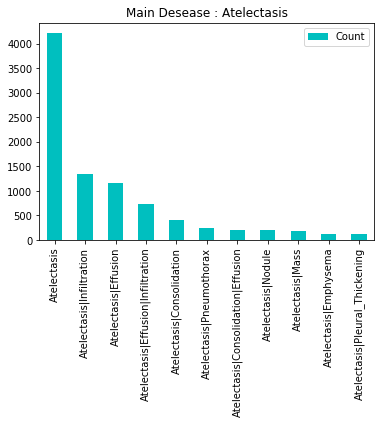

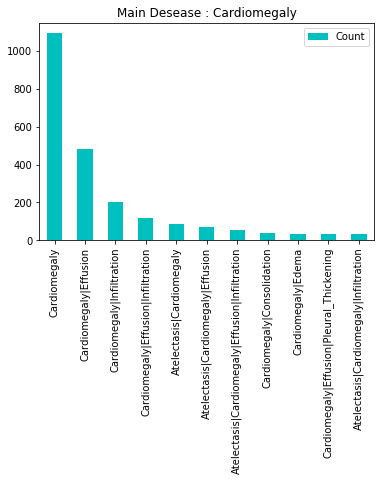

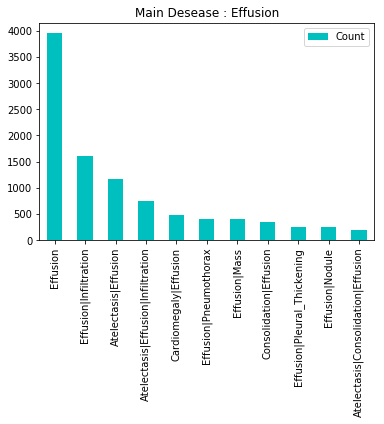

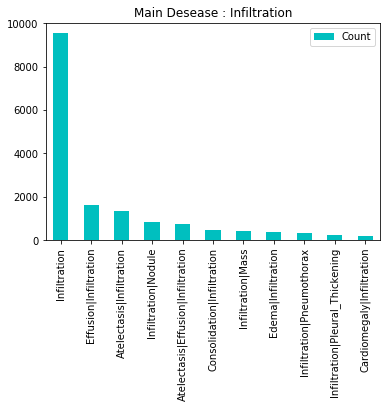

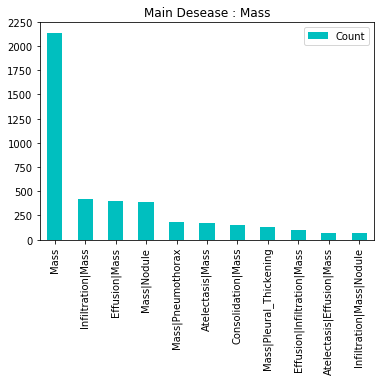

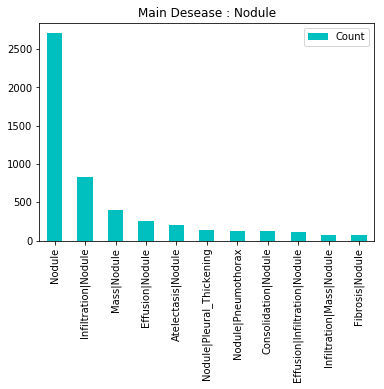

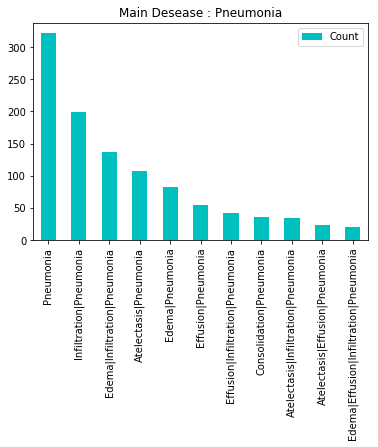

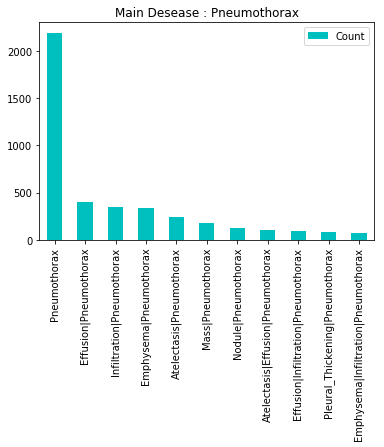

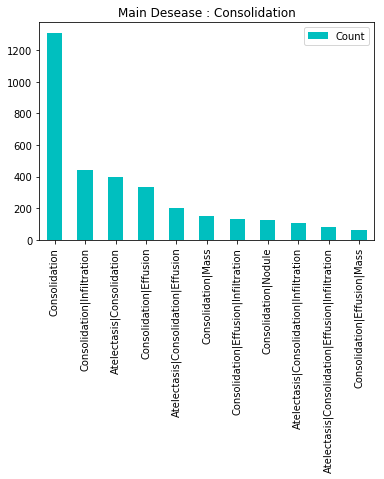

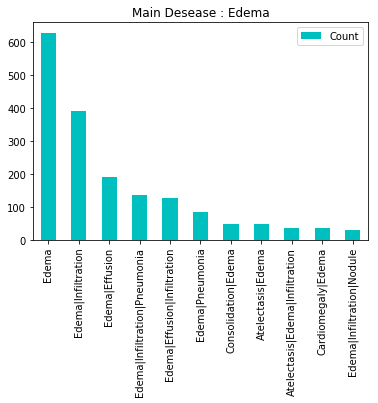

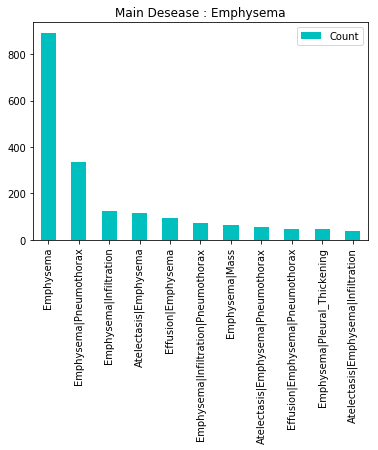

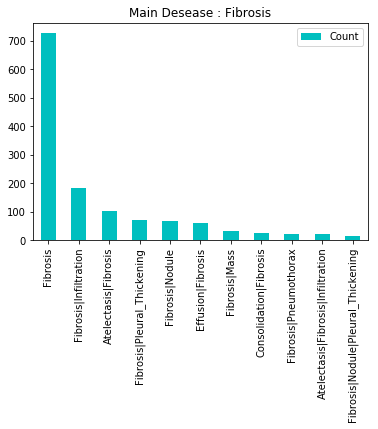

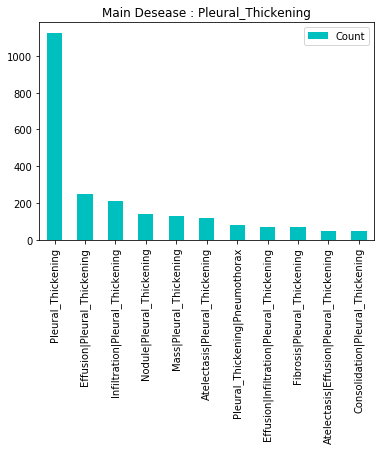

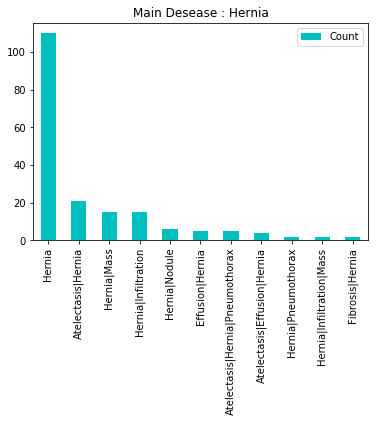

In [7]:
# 그래프 그리기.
# 어떤 병 순으로 합병증이 발생하는지 알기 위해 
for i in pathology_list:
    result = TopTenDisease(df, i)
    MakeGraph(result, i)